### Rumus
$ X_r = \frac{X_L + X_U}{2} $

untuk mencari sub interval berikutnya

$ X_L = X_r $ jika $ f(X_r) \times f(X_L) > 0 $

$ X_U = X_r $ jika $ f(X_r) \times f(X_U) < 0 $

### Soal
Diketahui $ f(x) = x^3 + 10x^2 - 7x - 196 $ dengan batas bawah $ XL = -5 $ dan batas atas $ XU = 8 $ dan nilai $ X $ sebenarnya = 4

In [1]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

def f(x):
    return x**3 + 10*x**2 - 7*x - 196

def bisection(f, xl, xu, tol, x_true):
    iterations = []
    iteration = 0
    xr_values = []  # Store xr values
    while (xu - xl) > tol:
        iteration += 1
        
        xr = (xl + xu) / 2
        fxl = np.round(f(xl), 2)
        fxr = f(xr)
        fxu = np.round(f(xu), 2)
        
        Et = np.round(abs((x_true - xr) / x_true) * 100, 2) 
        
        iterations.append([iteration, xl, xu, np.round(xr,2), Et, fxl, np.round(fxr,2), fxu])
        xr_values.append(xr)
        
        if fxr == 0:
            return xr, xr_values
        elif fxl * fxr < 0:
            xu = np.round(xr, 2)
        else:
            xl = np.round(xr, 2)
    
    headers = ["Iteration", "xl", "xu", "xr", "Et", "f(xl)", "f(xr)", "f(xu)"]
    print(tabulate(iterations, headers=headers, tablefmt="fancy_grid"))
    return (xl + xu) / 2, xr_values

# Initial guess
xl = -5
xu = 8
x_true = 4

# Tolerance
tol = 1e-6

# Call the bisection function
root, xr_values = bisection(f, xl, xu, tol, x_true)
# print(xr_values)
print("\nRoot:", root)

╒═════════════╤═══════╤══════╤══════╤═══════╤═════════╤═════════╤═════════╕
│   Iteration │    xl │   xu │   xr │    Et │   f(xl) │   f(xr) │   f(xu) │
╞═════════════╪═══════╪══════╪══════╪═══════╪═════════╪═════════╪═════════╡
│           1 │ -5    │ 8    │ 1.5  │ 62.5  │  -36    │ -180.62 │  900    │
├─────────────┼───────┼──────┼──────┼───────┼─────────┼─────────┼─────────┤
│           2 │  1.5  │ 8    │ 4.75 │ 18.75 │ -180.62 │  103.55 │  900    │
├─────────────┼───────┼──────┼──────┼───────┼─────────┼─────────┼─────────┤
│           3 │  1.5  │ 4.75 │ 3.12 │ 21.88 │ -180.62 │  -89.7  │  103.55 │
├─────────────┼───────┼──────┼──────┼───────┼─────────┼─────────┼─────────┤
│           4 │  3.12 │ 4.75 │ 3.94 │  1.62 │  -90.12 │   -7.77 │  103.55 │
├─────────────┼───────┼──────┼──────┼───────┼─────────┼─────────┼─────────┤
│           5 │  3.94 │ 4.75 │ 4.34 │  8.62 │   -7.18 │   44.4  │  103.55 │
├─────────────┼───────┼──────┼──────┼───────┼─────────┼─────────┼─────────┤
│           

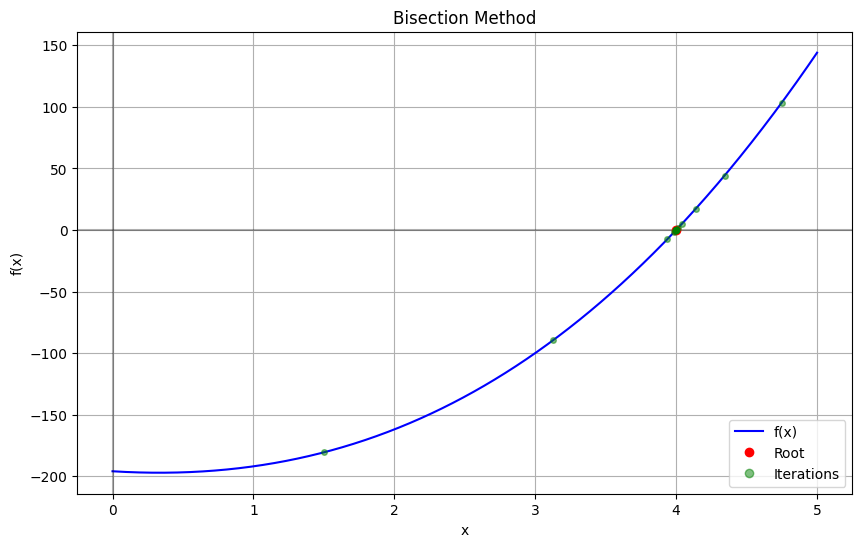

In [8]:
# Create x values for plotting
x = np.linspace(0, 5, 1000)
y = f(x)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='f(x)')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Bisection Method')
plt.legend()


# Mark the root on the plot
plt.plot(root, f(root), 'ro', label='Root')
# Plot all xr points
for xr in xr_values:
    plt.plot(xr, f(xr), 'go', alpha=0.5, markersize=4)
plt.plot([], [], 'go', label='Iterations', alpha=0.5)  # For legend
plt.legend()
plt.show()